/kaggle/input/danc-val/dance-val.csv
/kaggle/input/fa-data/data.csv
/kaggle/input/temp-stream/tempo-stream.csv
/kaggle/input/new-sp-yt/New_Spotify_Youtube.csv


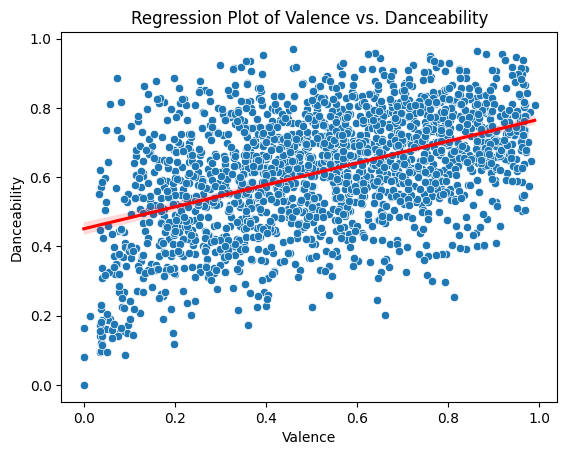

In [9]:
#Author: TS
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import matplotlib.pyplot as plt # plots
import seaborn as sns # best fit line

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#Analysis 1: Valence vs Danceability

#get datasets created with awk script
dance_df = pd.read_csv("/kaggle/input/danc-val/dance-val.csv", delimiter="^")

#dance_df.info()
# Plot data 
dance_sample_df = dance_df.sample(n=2000, random_state=42)
dance_scatter = sns.scatterplot(x='Valence', y='Danceability', data=dance_sample_df)
# Calculate best-fit line
plt.title('Regression Plot of Valence vs. Danceability')
dance_graph = sns.regplot(x='Valence', y='Danceability', data=dance_sample_df, scatter=False, line_kws={'color':'red'})

#Get top 5 sad songs and top 5 happy songs with high danceability



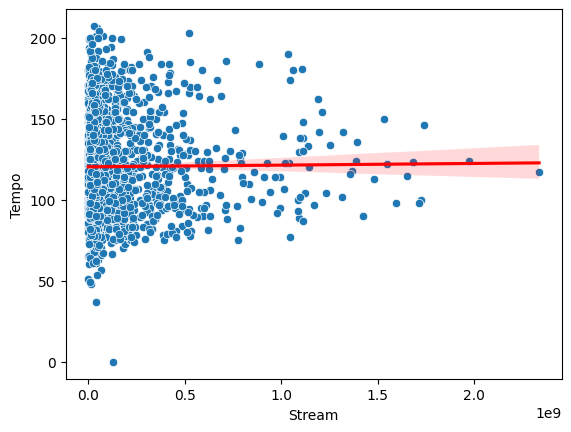

In [10]:
#Analysis 2: Tempo vs Streams
tempo_df = pd.read_csv("/kaggle/input/temp-stream/tempo-stream.csv", delimiter="^") #get data

# Plot data 
tempo_sample_df = tempo_df.sample(n=2000, random_state=42)
tempo_scatter = sns.scatterplot(x='Stream', y='Tempo', data=tempo_sample_df)
# Calculate and plot the best-fit line
tempo_graph = sns.regplot(x='Stream', y='Tempo', data=tempo_sample_df, scatter=False, line_kws={'color':'red'})

#get top 5 songs with energy and top 5 with tempo

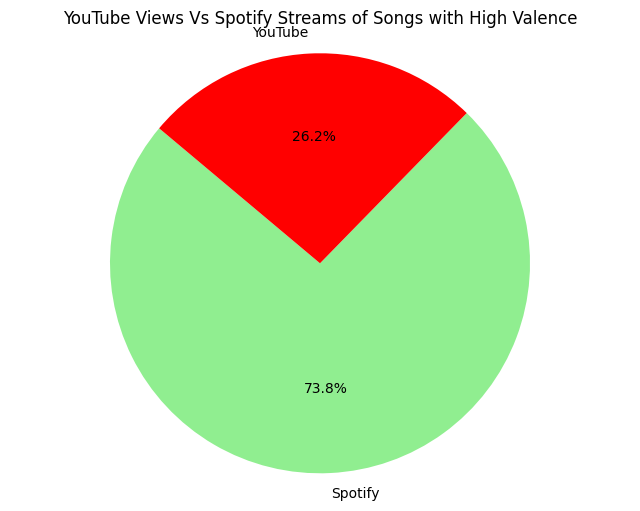

In [11]:
#Analysis #3 : YT vs SP - Valence
data = pd.read_csv("/kaggle/input/new-sp-yt/New_Spotify_Youtube.csv", delimiter="^")

data_df = data.sample(n=2000, random_state=42)

# Filter songs with valence above 0.66
high_valence_songs = data_df[data_df['Valence'] > 0.75]


# Count the number of songs with more Spotify streams and more YouTube views
spotify_more = high_valence_songs[high_valence_songs['Stream'] > high_valence_songs['Views']].shape[0]
youtube_more = high_valence_songs[high_valence_songs['Views'] > high_valence_songs['Stream']].shape[0]

# Pie chart labels
labels = ['Spotify', 'YouTube']
sizes = [spotify_more, youtube_more]
colors = ['lightgreen', 'red']

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('YouTube Views Vs Spotify Streams of Songs with High Valence')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()